3章 データの可視化

3.1 matplotlib

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

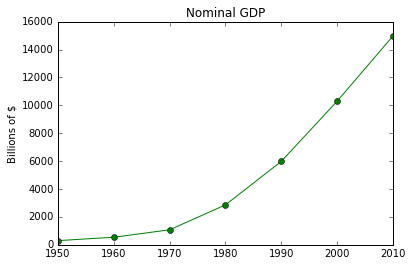

In [3]:
#折れ線グラフを作る。X軸を年、Y軸をGDPとする。
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
#タイトルを追加する
plt.title("Nominal GDP")
#Y軸にラベルを追加する
plt.ylabel("Billions of $")
plt.show()

3.2 棒グラフ

In [4]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscar = [5, 11, 3, 8, 10]

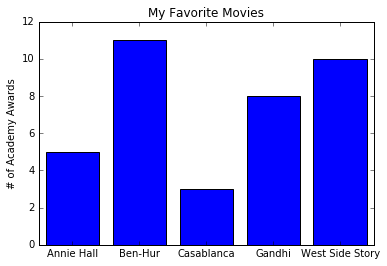

In [5]:
#棒の幅はデフォルトで0.8なので、左側に0.1加えてセンタリングさせる
xs = [i + 0.1 for i, _ in enumerate(movies)]
#X軸を[xs], 高さを[num_oscar]で棒グラフを作る
plt.bar(xs, num_oscar)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
#X軸のラベルに映画名を棒の中心に配置する
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

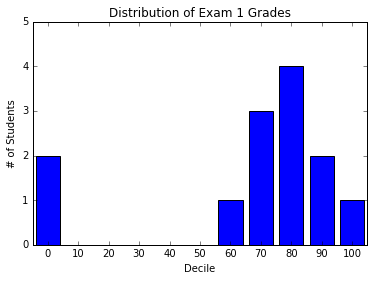

In [6]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade // 10 * 10 #//2つで割り算の商だけ表示
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x-4 for x in histogram.keys()],#グラフの棒を左に4ずらす
       histogram.values(),#値に合わせた高さに設定
       8)#横の幅を8にずらす
plt.axis([-5, 105, 0, 5]) #X軸の範囲を-5から105,Y軸の範囲を0から5とする
plt.xticks([10 * i for i in range(11)]) #X軸のラベル0,10,...,100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

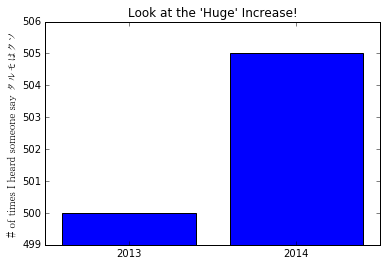

In [7]:
mentions = [500.0, 505.0]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say タルモはクソ", fontdict={'family':'HGSeikaishotaiPRO'})
#次の行を省略すると、0,1と共に+2.013e3がX軸上に表示されてしまう（なぜ？）
plt.ticklabel_format(useOffset=False)
#Y軸の500以上の部分だけを表示すると、誤った印象を与える
plt.axis([2012.5, 2014.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

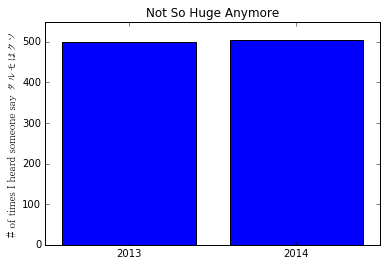

In [8]:
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say タルモはクソ", fontdict={'family':'HGSeikaishotaiPRO'})
#次の行を省略すると、0,1と共に+2.013e3がX軸上に表示されてしまう（なぜ？）
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5, 2014.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.ticklabel_format(useOffset=False)
plt.show()

3.3 折れ線グラフ

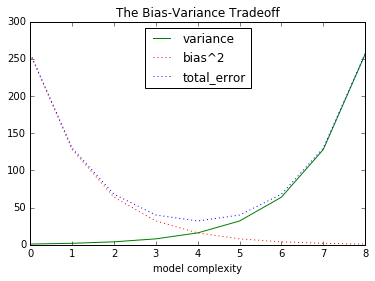

In [9]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x,y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

#plt.plotを複数回呼び出して、1つのグラフに複数の栓を描画可能
plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r:', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total_error')

#loc=9は「上部中央」を表す
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

3.4 散布図

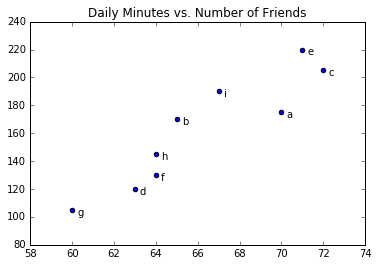

In [10]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)

#各点のラベル
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count),
                xytext=(5,-5),
                textcoords='offset points')
    
plt.title("Daily Minutes vs. Number of Friends")

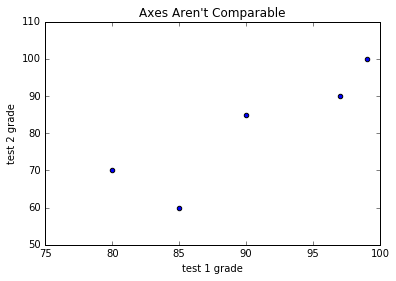

In [11]:
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

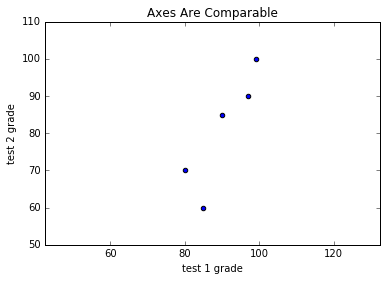

In [12]:
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

おまけ matplotlibで日本語使う時用にPCに入ってるフォント一覧を出す呪文

In [13]:
import matplotlib.font_manager as fm
import pandas as pd
# フォント一覧
fonts = fm.findSystemFonts() 
# フォントのパスと名前を取得、とりあえず10個表示
fontdata = [[str(font), fm.FontProperties(fname=font).get_name()] for font in fonts[:10]]
pd.DataFrame(fontdata, columns={0:'path', 1:'name'})

,0,1
0,c:\windows\fonts\agencyr.ttf,Agency FB
1,c:\windows\fonts\opensans-semibold.ttf,Open Sans
2,c:\windows\fonts\gabriola.ttf,Gabriola
3,c:\windows\fonts\califi.ttf,Californian FB
4,c:\windows\fonts\schlbkbi.ttf,Century Schoolbook
5,c:\windows\fonts\brlnsb.ttf,Berlin Sans FB
6,C:\WINDOWS\Fonts\ntailu.ttf,Microsoft New Tai Lue
7,C:\WINDOWS\Fonts\ARCARTER.ttf,AR CARTER
8,c:\program files (x86)\kingsoft\kingsoft offic...,MT Extra
9,C:\WINDOWS\Fonts\mmrtext.ttf,Myanmar Text
